In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, y_train = X_train_full[5000:], y_train_full[5000:]
X_valid, y_valid = X_train_full[:5000], y_train_full[:5000]
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

# Weight Initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'ConstantV2',
 'GlorotNormal',
 'GlorotNormalV2',
 'GlorotUniform',
 'GlorotUniformV2',
 'HeNormal',
 'HeNormalV2',
 'HeUniform',
 'HeUniformV2',
 'Identity',
 'IdentityV2',
 'Initializer',
 'LOCAL',
 'LecunNormal',
 'LecunNormalV2',
 'LecunUniform',
 'LecunUniformV2',
 'Ones',
 'OnesV2',
 'Orthogonal',
 'OrthogonalV2',
 'RandomNormal',
 'RandomNormalV2',
 'RandomUniform',
 'RandomUniformV2',
 'TruncatedNormal',
 'TruncatedNormalV2',
 'VarianceScaling',
 'VarianceScalingV2',
 'Zeros',
 'ZerosV2',
 'constant',
 'deserialize',
 'generic_utils',
 'get',
 'glorot_normal',
 'glorot_normalV2',
 'glorot_uniform',
 'glorot_uniformV2',
 'he_normal',
 'he_normalV2',
 'he_uniform',
 'he_uniformV2',
 'identity',
 'init_ops',
 'initializer',
 'initializers',
 'initializers_v1',
 'inspect',
 'keras_export',
 'lecun_normal',
 'lecun_normalV2',
 'lecun_uniform',
 'lecun_uniformV2',
 'legacy_serialization',
 'normal',
 'one',
 'ones',
 'orthogonal',
 'populate_deserializable_objects',
 'r

In [5]:
# keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
# init = keras.initializers.VarianceScaling(scale=2, mode="fan_avg", distribution="uniform")
# keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2469 - accuracy: 0.6183 - val_loss: 0.8610 - val_accuracy: 0.7190
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7831 - accuracy: 0.7425 - val_loss: 0.7047 - val_accuracy: 0.7710
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6776 - accuracy: 0.7769 - val_loss: 0.6387 - val_accuracy: 0.7932
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6210 - accuracy: 0.7946 - val_loss: 0.5934 - val_accuracy: 0.8080
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5844 - accuracy: 0.8073 - val_loss: 0.5629 - val_accuracy: 0.8168
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8136 - val_loss: 0.5417 - val_accuracy: 0.8200
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5369 - accuracy: 0.8199 - val_loss: 0.5282 - val_accuracy:

# Batch Normalization

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1386 - accuracy: 0.6504 - val_loss: 0.7560 - val_accuracy: 0.7598
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7350 - accuracy: 0.7647 - val_loss: 0.6175 - val_accuracy: 0.8038
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7907 - val_loss: 0.5518 - val_accuracy: 0.8206
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5857 - accuracy: 0.8051 - val_loss: 0.5123 - val_accuracy: 0.8296
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5484 - accuracy: 0.8140 - val_loss: 0.4859 - val_accuracy: 0.8338
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5253 - accuracy: 0.8218 - val_loss: 0.4665 - val_accuracy: 0.8410
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5064 - accuracy: 0.8269 - val_loss: 0.4500 - val_accuracy:

# Gradient Clipping

In [14]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
# optimizer = keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="mse", optimizer=optimizer)

# Reusing Pretrained Layers

In [15]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A),
           (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [16]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [17]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

In [19]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [20]:
model_A.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])

In [21]:
history = model_A.fit(X_train_A, y_train_A,epochs=20,
                     validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5524 - accuracy: 0.8242 - val_loss: 0.3585 - val_accuracy: 0.8757
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3467 - accuracy: 0.8804 - val_loss: 0.3119 - val_accuracy: 0.8919
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8918 - val_loss: 0.2874 - val_accuracy: 0.9036
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8985 - val_loss: 0.2749 - val_accuracy: 0.9071
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.9029 - val_loss: 0.2633 - val_accuracy: 0.9121
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2705 - accuracy: 0.9066 - val_loss: 0.2608 - val_accuracy: 0.9138
Epoch 7/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.2624 - accuracy: 0.9087 - val_loss: 0.2553 - val_accuracy:

In [22]:
model_A.save("my_model_A.h5")

In [23]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [24]:
model_B.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               metrics=["accuracy"])

In [25]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                     validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 30ms/step - loss: 0.3994 - accuracy: 0.9200 - val_loss: 0.3128 - val_accuracy: 0.9249
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3013 - accuracy: 0.9500 - val_loss: 0.2621 - val_accuracy: 0.9513
Epoch 3/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2512 - accuracy: 0.9750 - val_loss: 0.2277 - val_accuracy: 0.9635
Epoch 4/20
7/7 [==============================] - 0s 13ms/step - loss: 0.2170 - accuracy: 0.9900 - val_loss: 0.2013 - val_accuracy: 0.9706
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1912 - accuracy: 0.9900 - val_loss: 0.1816 - val_accuracy: 0.9716
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1701 - accuracy: 0.9900 - val_loss: 0.1653 - val_accuracy: 0.9757
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.1542 - accuracy: 0.9900 - val_loss: 0.1532 - val_accuracy: 0.9787
Epoch 8/20
7/7 [===========

In [26]:
model_B.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 50)                2550      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                

In [27]:
model_A = keras.models.load_model("my_model_A.h5")
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [28]:
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-2])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [29]:
for layer in model_B_on_A.layers[:-2]:
    layer.trainable = False
    
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"]
                    )
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, 
                          validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 28ms/step - loss: 0.5555 - accuracy: 0.7400 - val_loss: 0.5189 - val_accuracy: 0.7688
Epoch 2/4
7/7 [==============================] - 0s 12ms/step - loss: 0.5043 - accuracy: 0.7650 - val_loss: 0.4755 - val_accuracy: 0.8266
Epoch 3/4
7/7 [==============================] - 0s 12ms/step - loss: 0.4606 - accuracy: 0.8550 - val_loss: 0.4391 - val_accuracy: 0.8702
Epoch 4/4
7/7 [==============================] - 0s 12ms/step - loss: 0.4241 - accuracy: 0.9000 - val_loss: 0.4070 - val_accuracy: 0.8955


In [30]:
for layer in model_B_on_A.layers[:-2]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
                    metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                          validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 29ms/step - loss: 0.3705 - accuracy: 0.9300 - val_loss: 0.3304 - val_accuracy: 0.9503
Epoch 2/16
7/7 [==============================] - 0s 13ms/step - loss: 0.3012 - accuracy: 0.9500 - val_loss: 0.2809 - val_accuracy: 0.9645
Epoch 3/16
7/7 [==============================] - 0s 13ms/step - loss: 0.2541 - accuracy: 0.9650 - val_loss: 0.2458 - val_accuracy: 0.9686
Epoch 4/16
7/7 [==============================] - 0s 12ms/step - loss: 0.2209 - accuracy: 0.9850 - val_loss: 0.2189 - val_accuracy: 0.9706
Epoch 5/16
7/7 [==============================] - 0s 13ms/step - loss: 0.1952 - accuracy: 0.9950 - val_loss: 0.1983 - val_accuracy: 0.9757
Epoch 6/16
7/7 [==============================] - 0s 14ms/step - loss: 0.1752 - accuracy: 0.9950 - val_loss: 0.1819 - val_accuracy: 0.9767
Epoch 7/16
7/7 [==============================] - 0s 13ms/step - loss: 0.1594 - accuracy: 0.9950 - val_loss: 0.1686 - val_accuracy: 0.9787
Epoch 8/16
7/7 [===========

In [31]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0849 - accuracy: 0.9895


[0.08491554111242294, 0.9894999861717224]

In [32]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9865


[0.10669814795255661, 0.9865000247955322]

In [33]:
(100 - 0.983) / (100 - 0.99)

1.0000706999292999

# Momentum optimization

In [34]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

# Nesterov Accelerated Gradient (NAG)

In [35]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True)

# AdaGrad
* Bad at reaching global optimum in neural network models

In [36]:
optimizer = keras.optimizers.Adagrad(learning_rate=1e-3)

# RMSProp
* Fixes the convergance problem of AdaGrad to global optimum by accumulating
  only the gradients from most recent iterations by using exponential decay

In [37]:
optimizer = keras.optimizers.RMSprop(learning_rate=1e-3)

# Adam Optimization
* Combination of both RMSProp and Momentum optimization 

In [38]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

# Learning Rate Scheduling

In [39]:
pixel_mean = np.mean(X_train, axis=0, keepdims=True)
pixel_std = np.std(X_train, axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_mean) / pixel_std
X_valid_scaled = (X_valid - pixel_mean) / pixel_std
X_test_scaled = (X_test - pixel_mean) / pixel_std

In [40]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3, decay=1e-4)

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=25,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7180 - accuracy: 0.7526 - val_loss: 0.5423 - val_accuracy: 0.8172
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5116 - accuracy: 0.8217 - val_loss: 0.4894 - val_accuracy: 0.8344
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4733 - accuracy: 0.8356 - val_loss: 0.4685 - val_accuracy: 0.8416
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4524 - accuracy: 0.8423 - val_loss: 0.4521 - val_accuracy: 0.8462
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4382 - accuracy: 0.8480 - val_loss: 0.4430 - val_accuracy: 0.8504
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4278 - accuracy: 0.8514 - val_loss: 0.4360 - val_accuracy: 0.8528
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4196 - accuracy: 0.8546 - val_loss: 0.4290 - val_accuracy:

In [42]:
import matplotlib.pyplot as plt
import math

[0.001      0.00085332 0.00074416 0.00065976 0.00059256 0.00053778
 0.00049227 0.00045386 0.00042102 0.0003926  0.00036778 0.00034591
 0.0003265  0.00030915 0.00029355 0.00027945 0.00026664 0.00025495
 0.00024425 0.00023441 0.00022533 0.00021692 0.00020913 0.00020187
 0.0001951 ]


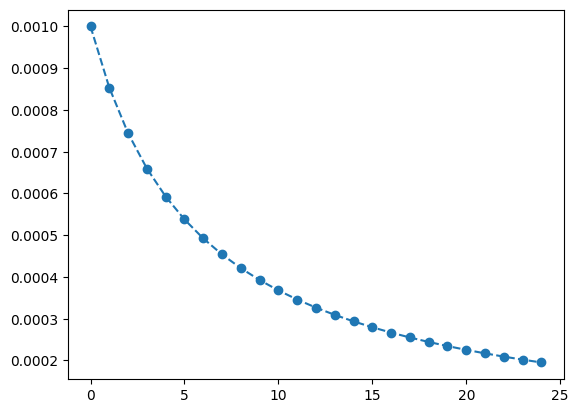

In [43]:
lr0 = 1e-3
decay = 1e-4
epochs = np.arange(25)
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
lrs = lr0 / (1 + decay * epochs * n_steps_per_epoch)
print(lrs)
plt.plot(epochs, lrs, "o--")

# Exponential Scheduling

lr = lr0 * 0.1^(epoch /s)

In [44]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(1e-2, s=20)

In [45]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [46]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, 
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7506 - accuracy: 0.7779 - val_loss: 0.7136 - val_accuracy: 0.8056 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6444 - accuracy: 0.8053 - val_loss: 0.6322 - val_accuracy: 0.7988 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6242 - accuracy: 0.8080 - val_loss: 0.6915 - val_accuracy: 0.7588 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5637 - accuracy: 0.8295 - val_loss: 0.6943 - val_accuracy: 0.8194 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5256 - accuracy: 0.8368 - val_loss: 0.5176 - val_accuracy: 0.8382 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4722 - accuracy: 0.8522 - val_loss: 0.5127 - val_accuracy: 0.8528 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 6s

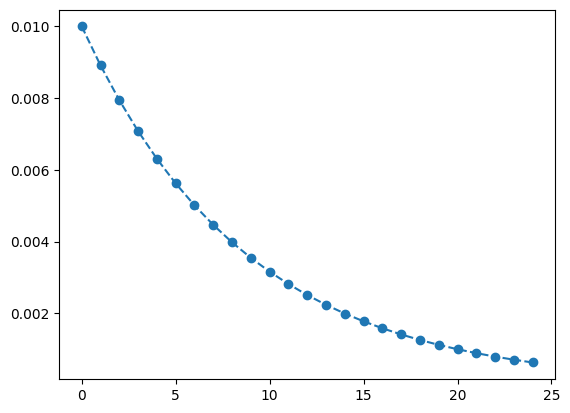

In [47]:
plt.plot(history.epoch, history.history["lr"], "o--")

# One-Cycle Scheduler

In [52]:
K = keras.backend

In [53]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [54]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5991 - accuracy: 0.8419 - val_loss: 0.6531 - val_accuracy: 0.8592
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 1.2038 - accuracy: 0.6508 - val_loss: 1.4808 - val_accuracy: 0.5566
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 1.8794 - accuracy: 0.3800 - val_loss: 1.8856 - val_accuracy: 0.3212
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 2.0937 - accuracy: 0.2769 - val_loss: 2.2410 - val_accuracy: 0.1726
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 2.4702 - accuracy: 0.1403 - val_loss: 2.4327 - val_accuracy: 0.0984
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 2.5366 - accuracy: 0.0999 - val_loss: 2.5472 - val_accuracy: 0.0988
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 2.5868 - accuracy: 0.1017 - val_loss: 2.6228 - val_accuracy:

# Avoiding Overfitting Through Regularization

# ℓ1 and ℓ2 regularization

In [55]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal",
                      kernel_regularizer=keras.regularizers.l2(1e-2)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",
                      kernel_regularizer=keras.regularizers.l2(1e-2)),
    keras.layers.Dense(10, activation="softmax",
                      kernel_regularizer=keras.regularizers.l2(1e-2)),
    
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 1.5897 - accuracy: 0.8128 - val_loss: 0.7097 - val_accuracy: 0.8412
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7184 - accuracy: 0.8283 - val_loss: 0.6895 - val_accuracy: 0.8358


###### Instead of repeating the regularizer hyperparameter on every layer with can use functools partial once 

In [63]:
from functools import partial

In [65]:
regularized_dense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(1e-2))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    regularized_dense(300),
    regularized_dense(100),
    regularized_dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=2, 
                   validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6492 - accuracy: 0.8141 - val_loss: 0.7060 - val_accuracy: 0.8398
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7190 - accuracy: 0.8286 - val_loss: 0.6918 - val_accuracy: 0.8370
